In [ ]:
# import the necessary libraries
import numpy as np 
import pandas as pd 

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py

import folium
from folium import Choropleth, Circle, Marker

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 156 kB 27.6 MB/s 


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
city_day = pd.read_csv('/content/drive/MyDrive/Air Quality /city_day.csv')

In [ ]:
display(city_day.head()) # display head of the data 
print(city_day.shape)

City        Date  PM2.5  PM10  ...  Toluene  Xylene  AQI  AQI_Bucket
0  Ahmedabad  2015-01-01    NaN   NaN  ...     0.02    0.00  NaN         NaN
1  Ahmedabad  2015-01-02    NaN   NaN  ...     5.50    3.77  NaN         NaN
2  Ahmedabad  2015-01-03    NaN   NaN  ...    16.40    2.25  NaN         NaN
3  Ahmedabad  2015-01-04    NaN   NaN  ...    10.14    1.00  NaN         NaN
4  Ahmedabad  2015-01-05    NaN   NaN  ...    18.89    2.78  NaN         NaN

[5 rows x 16 columns]

(29531, 16)


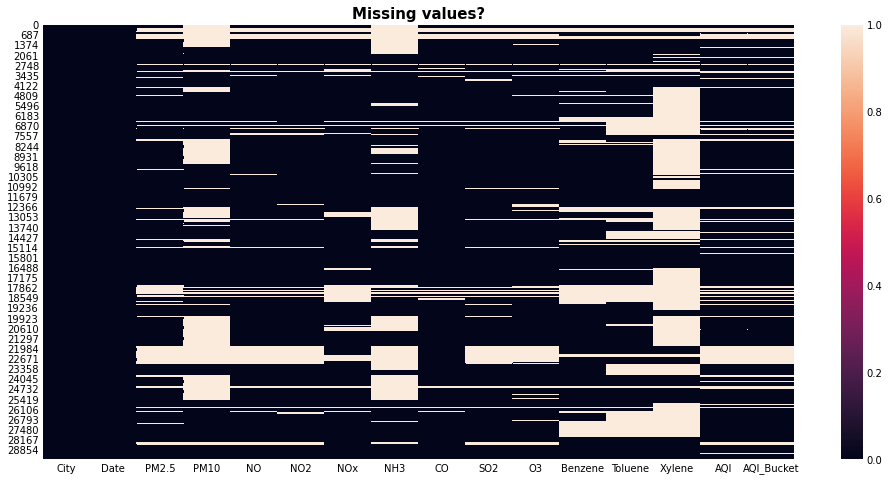

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(city_day.isnull())
plt.title("Missing values?", weight= 'bold', fontsize = 15)
plt.show()

**Observations:**
1.  It looks there is a lot of missing values that we need to deal with. 

In [ ]:
# Visualisation of reviewers nationality
for col in city_day.columns.values: # For each column

    unique_values = pd.unique(city_day[col].astype(str)) # Create a list of unique values 
    text = '\n \033[33m' + col + '\033[0m is of data type \033[32m' + str(city_day[col].dtypes) + '\033[0m , has \033[91m' + str(len(unique_values)) + '\033[0m unique values, and \033[91m' + str(city_day[col].isnull().sum()) + '\033[0m null values'
    print(text)

    if len(unique_values) < 30: # If the column have less than 30 unique then print them
        print(unique_values)


 City is of data type object , has 26 unique values, and 0 null values
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']

 Date is of data type object , has 2009 unique values, and 0 null values

 PM2.5 is of data type float64 , has 11717 unique values, and 4598 null values

 PM10 is of data type float64 , has 12572 unique values, and 11140 null values

 NO is of data type float64 , has 5777 unique values, and 3582 null values

 NO2 is of data type float64 , has 7405 unique values, and 3585 null values

 NOx is of data type float64 , has 8157 unique values, and 4185 null values

 NH3 is of data type float64 , has 5923 unique values, and 10328 null values

 CO is of data type float64 , has 1780 unique values, and 2059 null values

 SO2 is 

In [ ]:
# Convert string to datetime64
city_day['Date'] = pd.to_datetime(city_day['Date'])
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-07-01 00:00:00


In [ ]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene'] # combine Benzene, Toluene and Xylene into single BTX column
city_day.drop(['Benzene','Toluene','Xylene'],axis=1); 

city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10'] # Combining PM2.5 and PM10 into single Particulate matter column

In [ ]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX'] # Setting major pollutants 

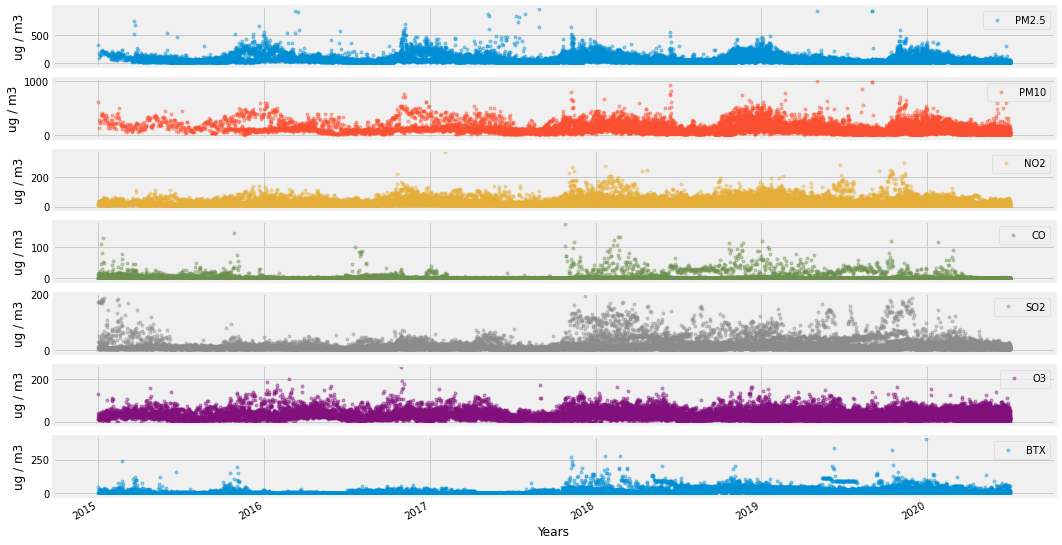

In [ ]:
city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.4, linestyle='None', figsize=(16, 10), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

**Observations:**
1. PM2.5 and PM10 seems to have seasonal effect as they have higher values during start and end of an year. 
2. CO, SO2, and BTX level looks increasing in recent years (After 2017) 

In [ ]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

# **Year-Wise and Month-Wise varriation in Pollutants**

In [ ]:
city_day.reset_index(inplace=True)

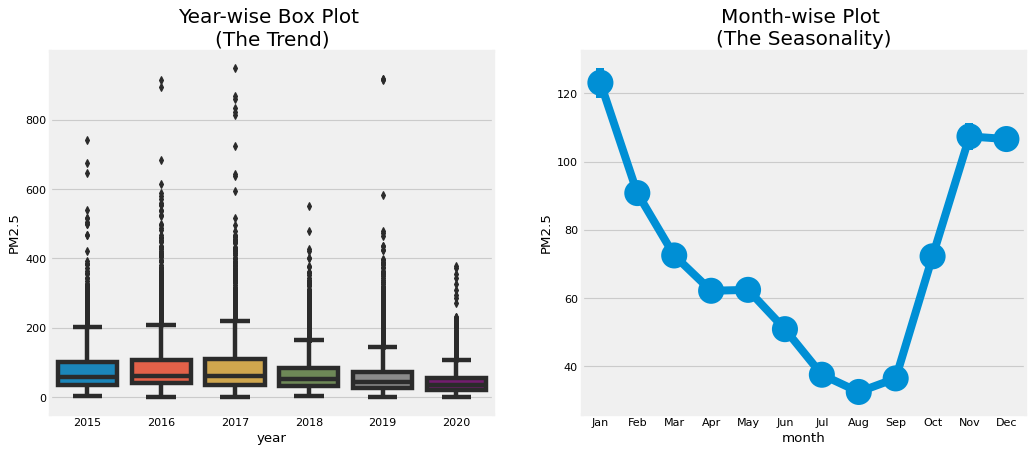

In [ ]:
df = city_day.copy()
value='PM2.5'
trend_plot(df,value)

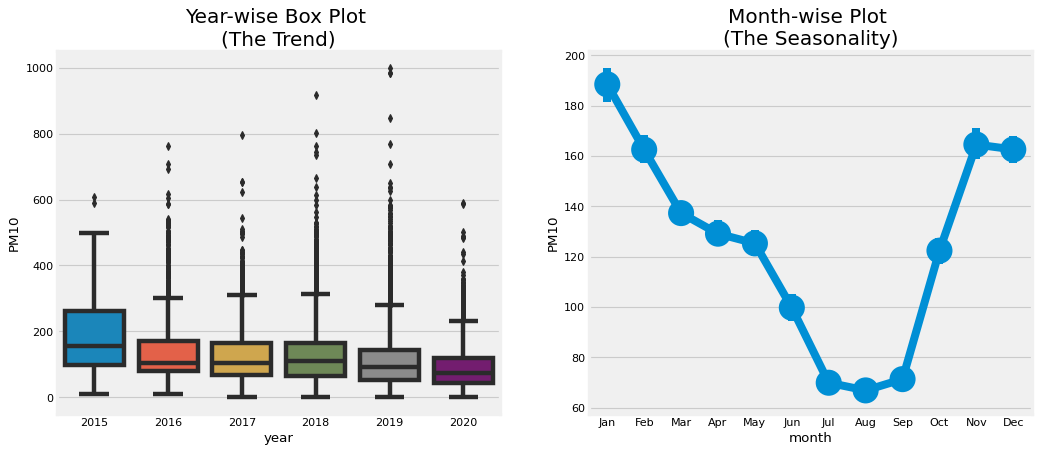

In [ ]:
df = city_day.copy()
value='PM10'
trend_plot(df,value)

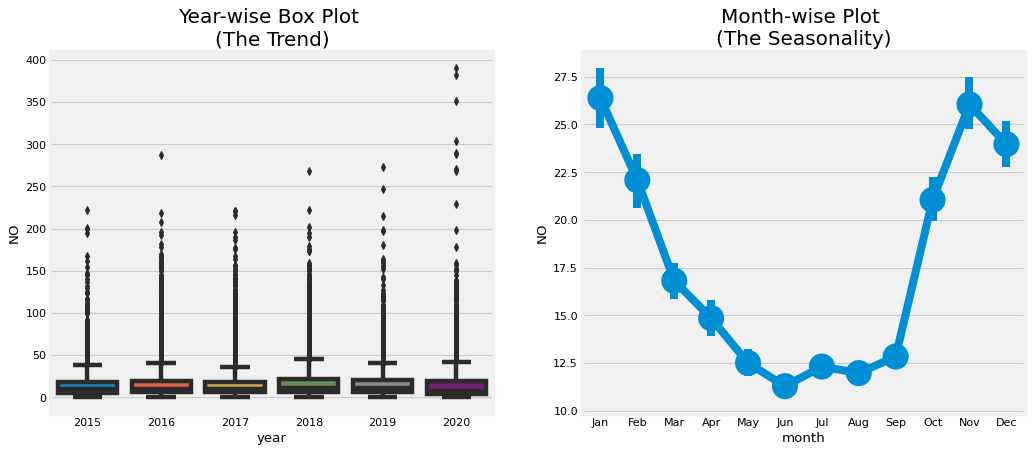

In [ ]:
df = city_day.copy()
value='NO'
trend_plot(df,value)

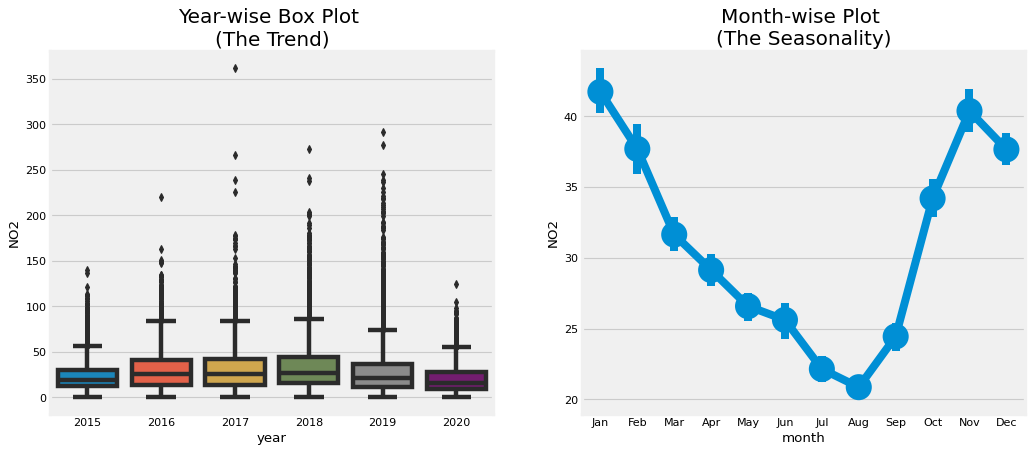

In [ ]:
df = city_day.copy()
value='NO2'
trend_plot(df,value)

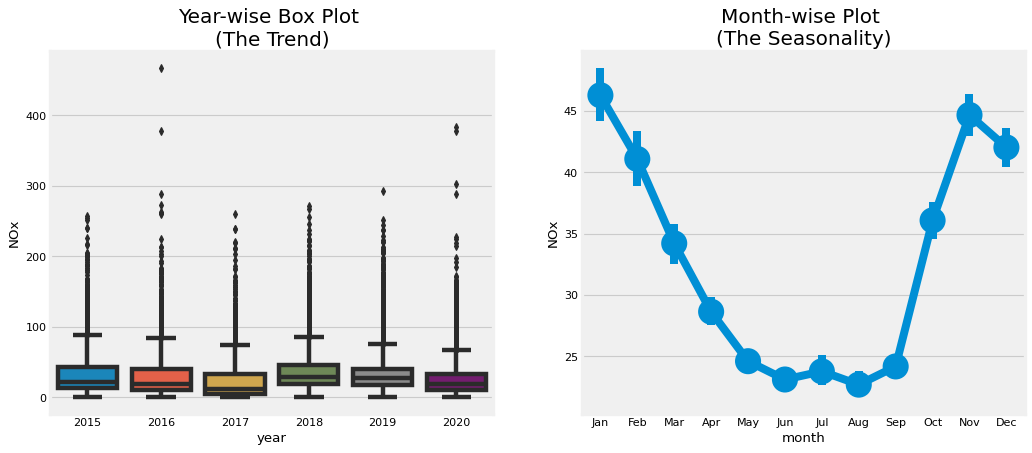

In [ ]:
df = city_day.copy()
value='NOx'
trend_plot(df,value)

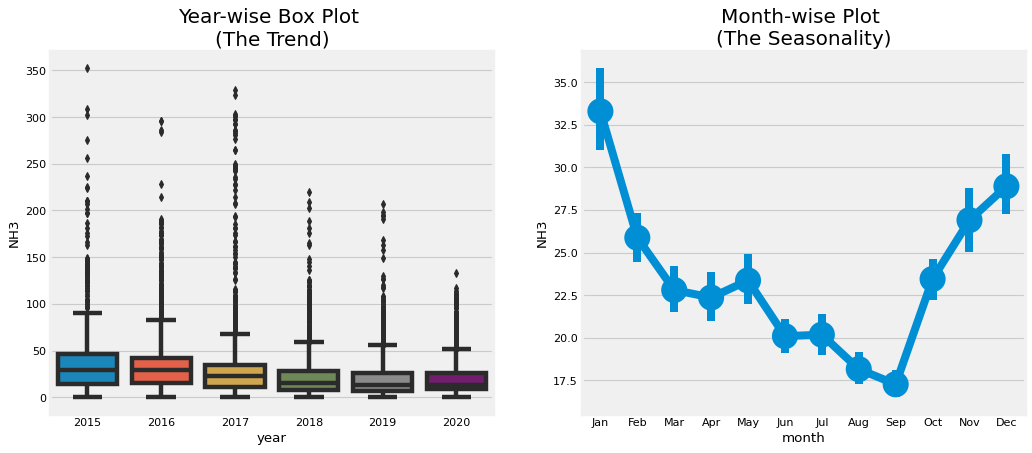

In [ ]:
df = city_day.copy()
value='NH3'
trend_plot(df,value)

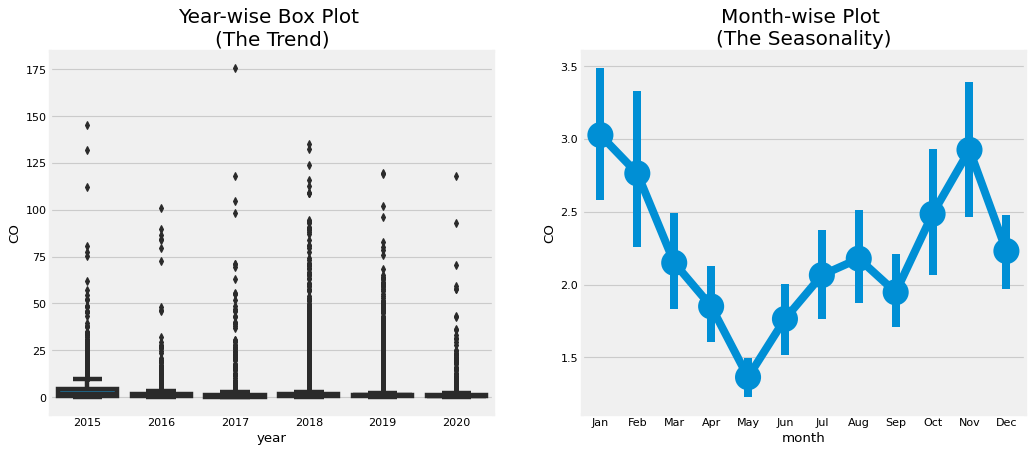

In [ ]:
df = city_day.copy()
value='CO'
trend_plot(df,value)

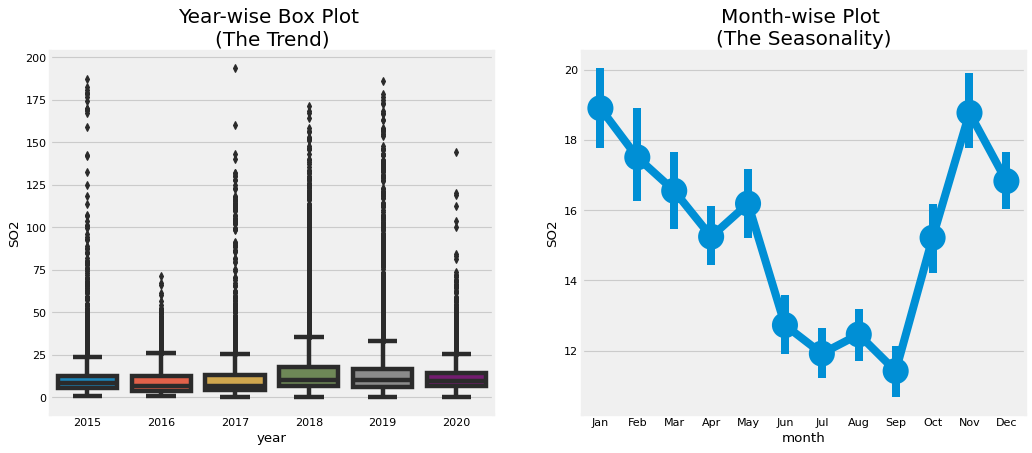

In [ ]:
df = city_day.copy()
value='SO2'
trend_plot(df,value)

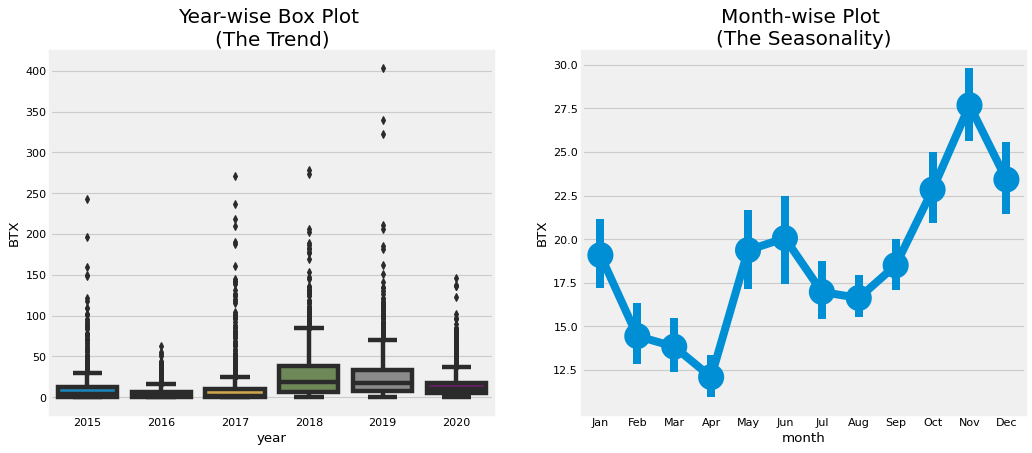

In [ ]:
df = city_day.copy()
value='BTX'
trend_plot(df,value)

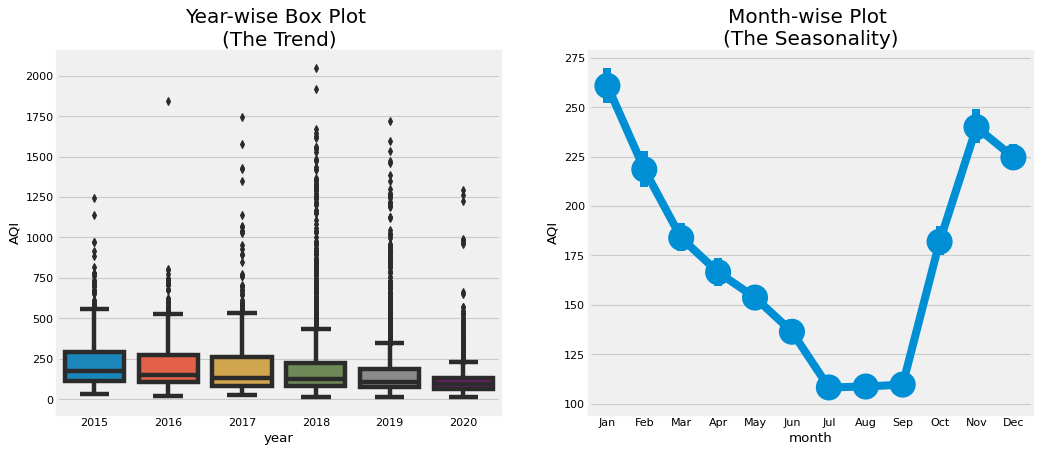

In [ ]:
df = city_day.copy()
value='AQI'
trend_plot(df,value)

**Observations:**
1. Almost all pollutants have the smallest quntity and best AQI during rainy seasons which was expected too

# **City-Wise Pollution levels**

In [ ]:
df_chart = city_day.pivot(index='Date', columns='City', values='AQI')
df_chart = df_chart.fillna(df_chart.mean())
df_chart.head()

City         Ahmedabad     Aizawl  ...  Thiruvananthapuram  Visakhapatnam
Date                               ...                                   
2015-01-01  452.122939  34.765766  ...           75.878327     117.269855
2015-01-02  452.122939  34.765766  ...           75.878327     117.269855
2015-01-03  452.122939  34.765766  ...           75.878327     117.269855
2015-01-04  452.122939  34.765766  ...           75.878327     117.269855
2015-01-05  452.122939  34.765766  ...           75.878327     117.269855

[5 rows x 26 columns]

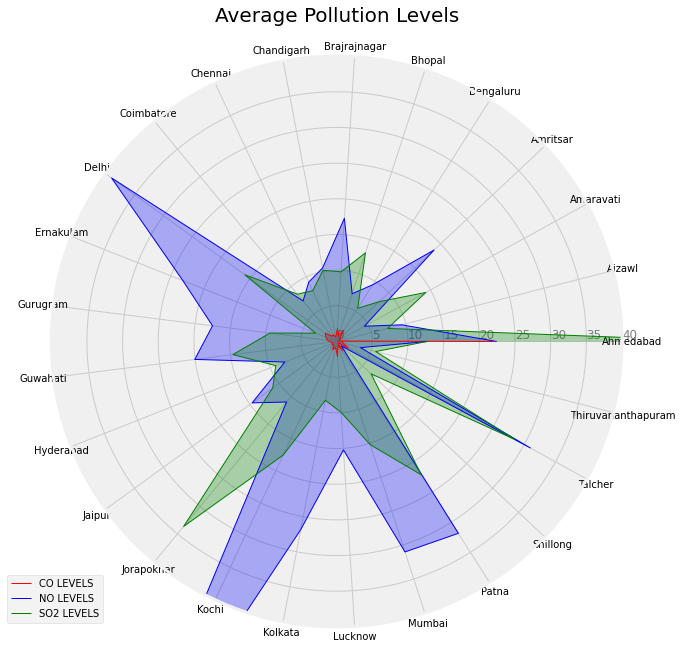

In [ ]:
import math
df_CO = city_day.pivot(index='Date', columns='City', values='CO')
df_CO = df_CO.fillna(df_CO.mean())

df_NO = city_day.pivot(index='Date', columns='City', values='NO')
df_NO = df_NO.fillna(df_NO.mean())

df_SO2 = city_day.pivot(index='Date', columns='City', values='SO2')
df_SO2 = df_SO2.fillna(df_SO2.mean())

categories=list(df_CO)[0:]
N = len(categories)

values_co  = df_CO.mean(axis=0)
values_no  = df_NO.mean(axis=0)
values_so2 = df_SO2.mean(axis=0)

angles = [n / float(N-1) * 2 * math.pi for n in range(N-1)]
angles += angles[:1]

fig = plt.figure(figsize=(25,10.5))
ax = plt.subplot(111, polar=True)
 
plt.xticks(angles[:-1], categories, color='black', size=10)
 
ax.set_rlabel_position(0)
plt.yticks([0,5,10,15,20,25,30,35,40], ["0","5","10","15","20","25","30","35","40"], color="grey", size=12)
plt.ylim(0,40)
 
ax.plot(angles, values_co, 'red',linewidth=1, linestyle='solid', label="CO LEVELS")
ax.fill(angles, values_co, 'red', alpha=0.3)

ax.plot(angles, values_no, 'blue',linewidth=1, linestyle='solid', label="NO LEVELS")
ax.fill(angles, values_no, 'blue', alpha=0.3)

ax.plot(angles, values_so2,'green',linewidth=1, linestyle='solid', label="SO2 LEVELS")
ax.fill(angles, values_so2,'green', alpha=0.3)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Average Pollution Levels",fontsize=20);

In [ ]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

Date       City     AQI AQI_Bucket
1461 2019-01-01  Ahmedabad  1474.0     Severe
1462 2019-01-02  Ahmedabad  1246.0     Severe
1463 2019-01-03  Ahmedabad  1719.0     Severe
1464 2019-01-04  Ahmedabad  1264.0     Severe
1465 2019-01-05  Ahmedabad  1127.0     Severe

In [ ]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)

In [ ]:
AQI_pivot.head()

City        Ahmedabad  Bengaluru  Chennai  Delhi  Hyderabad  Mumbai
Date                                                               
2019-01-01     1474.0      128.0    212.0  475.0      132.0   181.0
2019-01-02     1246.0      103.0    158.0  501.0      133.0   175.0
2019-01-03     1719.0      101.0    167.0  537.0      141.0   239.0
2019-01-04     1264.0      106.0    192.0  432.0      142.0   221.0
2019-01-05     1127.0      104.0    116.0  440.0      148.0   180.0

In [ ]:
#Source code for racing barchart: https://github.com/dexplo/bar_chart_race
AQI_2020 = AQI_pivot[AQI_pivot.index > '2019-12-31']
bcr_html = bcr.bar_chart_race(df=AQI_2020, filename=None, period_length=300,orientation='v',figsize=(4, 3),bar_label_size=7,tick_label_size=7,title='AQI levels in 2020')

In [ ]:
from IPython.display import display, HTML
display(bcr_html)

In [ ]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [ ]:
print(AQI_beforeLockdown.shape)
print(AQI_afterLockdown.shape)

(85, 6)
(37, 6)


In [ ]:
print(AQI_beforeLockdown.mean().values)
print(AQI_afterLockdown.mean().values)

[383.77647059  96.02352941  80.31764706 246.30588235  94.43529412
 148.77647059]
[127.81081081  68.48648649  62.35135135 107.27027027  65.56756757
  73.89189189]


In [ ]:
list(AQI_pivot.columns.values)

['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Hyderabad', 'Mumbai']

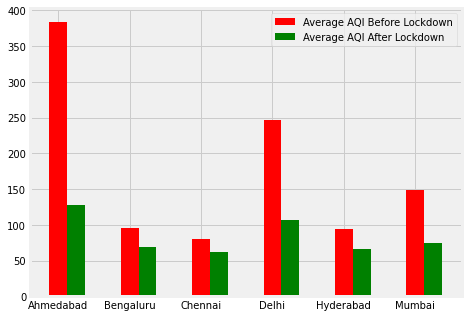

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[383.77647059,  96.02352941,  80.31764706, 246.30588235,  94.43529412, 148.77647059],
[127.81081081,  68.48648649,  62.35135135, 107.27027027,  65.56756757, 73.89189189]]
cities = ['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Hyderabad', 'Mumbai']
X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cities, data[0], color = 'r', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.legend(labels=['Average AQI Before Lockdown', 'Average AQI After Lockdown'])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Air Quality /COVID-19 Survey Student Responses.csv')

In [ ]:
df.head()

ID  ... What you miss the most
0  R1  ...         School/college
1  R2  ...  Roaming around freely
2  R3  ...             Travelling
3  R4  ...    Friends , relatives
4  R5  ...             Travelling

[5 rows x 19 columns]

In [ ]:
# Visualisation of reviewers nationality
for col in df.columns.values: # For each column

    unique_values = pd.unique(df[col].astype(str)) # Create a list of unique values 
    text = '\n \033[33m' + col + '\033[0m is of data type \033[32m' + str(df[col].dtypes) + '\033[0m , has \033[91m' + str(len(unique_values)) + '\033[0m unique values, and \033[91m' + str(df[col].isnull().sum()) + '\033[0m null values'
    print(text)

    if len(unique_values) < 30: # If the column have less than 30 unique then print them
        print(unique_values)


 ID is of data type object , has 1182 unique values, and 0 null values

 Region of residence is of data type object , has 2 unique values, and 0 null values
['Delhi-NCR' 'Outside Delhi-NCR']

 Age of Subject is of data type int64 , has 42 unique values, and 0 null values

 Time spent on Online Class is of data type float64 , has 21 unique values, and 0 null values
['2.0' '0.0' '7.0' '3.0' '1.0' '5.0' '4.0' '8.0' '6.0' '1.5' '2.5' '0.1'
 '0.5' '9.0' '5.5' '0.75' '0.7' '3.5' '0.8' '10.0' '7.5']

 Rating of Online Class experience is of data type object , has 6 unique values, and 24 null values
['Good' 'Excellent' 'Very poor' 'Average' 'nan' 'Poor']

 Medium for online class is of data type object , has 6 unique values, and 51 null values
['Laptop/Desktop' 'Smartphone' 'Tablet' 'nan' 'Any Gadget'
 'Smartphone or Laptop/Desktop']

 Time spent on self study is of data type float64 , has 23 unique values, and 0 null values
['4.0' '0.0' '3.0' '2.0' '6.0' '1.0' '5.0' '18.0' '8.0' '17.0' '0.5'

In [ ]:
df['Time spent on TV'].replace('No tv', 0, inplace=True)
df['Time spent on TV'].replace('n', 0, inplace=True)
df['Time spent on TV'].replace('N', 0, inplace=True)
df['Time spent on TV'].replace(' ', 0, inplace=True)
df['Time spent on TV'] = df['Time spent on TV'].astype('float')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('None ', 'None')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('Whatsapp', 'WhatsApp')
df['What you miss the most'] = df['What you miss the most'].replace('All', 'ALL')
df['What you miss the most'] = df['What you miss the most'].replace('NOTHING', 'Nothing')

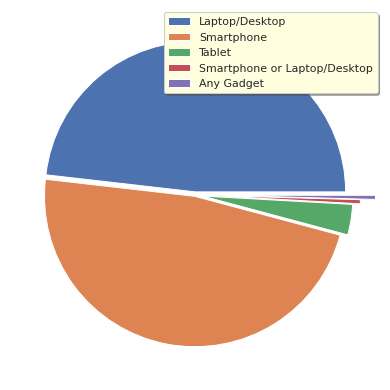

In [ ]:
dict_ = df['Medium for online class'].value_counts().to_dict()
plt.figure(figsize=(6,12))
plt.pie(x=dict_.values(),
        startangle=0, explode=[0.02, 0.01, 0.05, 0.1, 0.2])
plt.legend(labels=dict_.keys(), loc='upper right',shadow=True, facecolor='lightyellow')
plt.show()

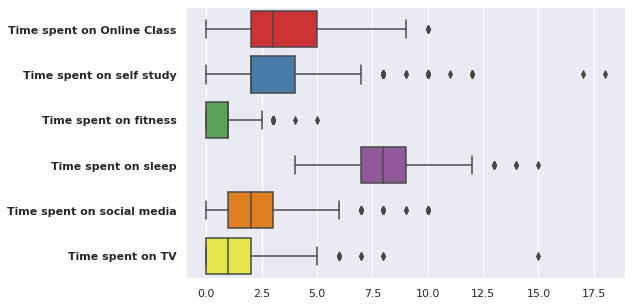

In [ ]:
plt.figure(figsize=(7,5))
sns.set(style='darkgrid')
sns.boxplot(data=df[['Time spent on Online Class','Time spent on self study','Time spent on fitness',
                    'Time spent on sleep','Time spent on social media', 'Time spent on TV']],
             orient='h', palette='Set1')
plt.yticks(weight='bold')
plt.show()

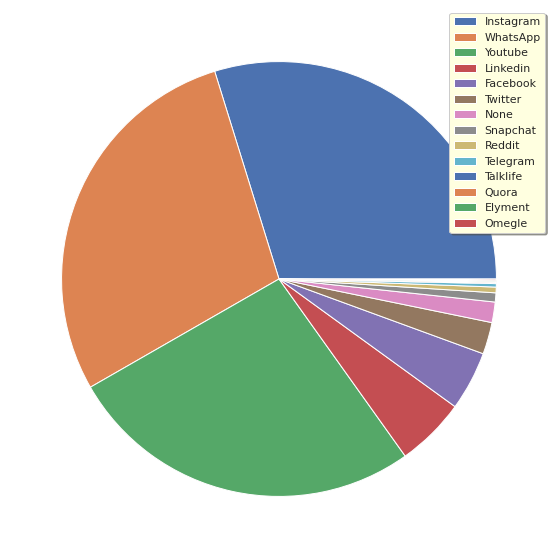

In [ ]:
dict_ = df['Prefered social media platform'].value_counts().to_dict()
plt.figure(figsize=(10,10))
plt.pie(x=dict_.values(), startangle=0)
plt.legend(labels=dict_.keys(), loc='upper right',shadow=True, facecolor='lightyellow')
plt.show()

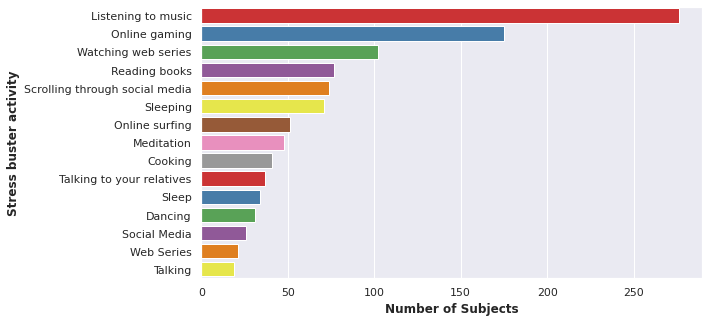

In [ ]:
plt.figure(figsize=(8,5))
sns.set(style='darkgrid')
sns.countplot(y='Stress busters', data=df, order=df['Stress busters'].value_counts().index[:15], palette='Set1')
plt.xlabel("Number of Subjects", weight='bold')
plt.ylabel("Stress buster activity", weight='bold')
plt.show()

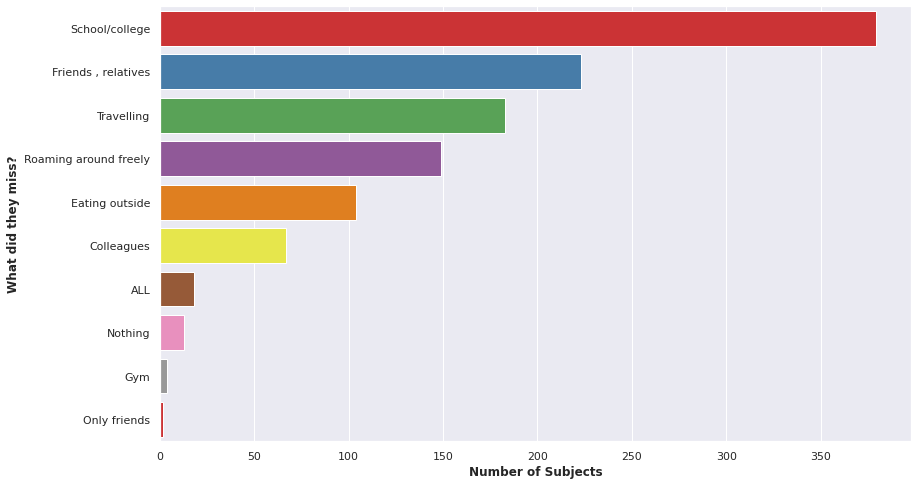

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.countplot(y='What you miss the most', data=df, order=df['What you miss the most'].value_counts().index[:10], palette='Set1')
plt.xlabel("Number of Subjects", weight='bold')
plt.ylabel("What did they miss?", weight='bold')
plt.show()